# 


###### <b>Importing libraries</b>

In [21]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
#Display charts within the cells
%matplotlib inline

###### <b>Import Data</b>

In [19]:
import os
current_working_directory = os.getcwd()

# print output to the console
print(current_working_directory)

c:\Users\Danyoh\Desktop\A2


In [23]:
df = pd.read_csv('bbc-news-data-modified.csv')
#Can display all more/all data by changing head(None) or head(X) where x is number
df.head()

,title,content
0,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


###### <b>Text Preprocessing Functions</b>

In [24]:
from nltk.tokenize import word_tokenize

def tokenization(df):
    #tokenization of words
    df['tokens'] = df['title'] + df['content']
    wordTok = df['tokens'].str.split()
    return wordTok

from nltk.corpus import stopwords
nltk.download('stopwords')

def stop_words_removal(wordTok):
    #converts the wordTok to lower case and removes stop words
    stop_words = set(stopwords.words('english'))
    filtered_words = wordTok.apply(lambda wordTok: [w for w in wordTok if not w.lower() in stop_words])
    return filtered_words

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def lemmatization(filtered_words):
    #lemmatizes filtered_words
    lemmatizer = WordNetLemmatizer()
    lem_words = filtered_words.apply(lambda filtered_words: [lemmatizer.lemmatize(w) for w in filtered_words])
    return lem_words

from nltk.stem import PorterStemmer

def stemming(lem_words):
    #stemmatizes lemmatized words
    stemmer = PorterStemmer()
    stem_words = lem_words.apply(lambda lem_words: [stemmer.stem(w) for w in lem_words])
    return stem_words

from sklearn.feature_extraction.text import TfidfVectorizer
def vectorizerization(stem_words):
    #Vectorizerization to transform data into matrix of TF-IDF features
    joiningArray = []
    for word in stem_words:
        joiningArray.append(" ".join(word))
    vectorizer = TfidfVectorizer(max_features=3000)
    vectorized_words = vectorizer.fit_transform(joiningArray)
    vectorized_data = vectorized_words.toarray()
    gfno = vectorizer.get_feature_names_out()
    vectorized_words = pd.DataFrame(data=vectorized_data, columns=gfno)
    
    return vectorized_words
    


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Danyoh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Danyoh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
#Tokenization
wordTok = tokenization(df)
wordTok.head()

0    [Ad, sales, boost, Time, Warner, profit, Quart...
1    [Dollar, gains, on, Greenspan, speech, The, do...
2    [Yukos, unit, buyer, faces, loan, claim, The, ...
3    [High, fuel, prices, hit, BA's, profits, Briti...
4    [Pernod, takeover, talk, lifts, Domecq, Shares...
Name: tokens, dtype: object

In [26]:
#Stop words removal
filtered_words = stop_words_removal(wordTok)
filtered_words.head()

0    [Ad, sales, boost, Time, Warner, profit, Quart...
1    [Dollar, gains, Greenspan, speech, dollar, hit...
2    [Yukos, unit, buyer, faces, loan, claim, owner...
3    [High, fuel, prices, hit, BA's, profits, Briti...
4    [Pernod, takeover, talk, lifts, Domecq, Shares...
Name: tokens, dtype: object

In [27]:
#lemmatization
lem_words = lemmatization(filtered_words)
lem_words.head()

0    [Ad, sale, boost, Time, Warner, profit, Quarte...
1    [Dollar, gain, Greenspan, speech, dollar, hit,...
2    [Yukos, unit, buyer, face, loan, claim, owner,...
3    [High, fuel, price, hit, BA's, profit, British...
4    [Pernod, takeover, talk, lift, Domecq, Shares,...
Name: tokens, dtype: object

In [28]:
#stemming
stem_words = stemming(lem_words)
stem_words.head()

0    [ad, sale, boost, time, warner, profit, quarte...
1    [dollar, gain, greenspan, speech, dollar, hit,...
2    [yuko, unit, buyer, face, loan, claim, owner, ...
3    [high, fuel, price, hit, ba', profit, british,...
4    [pernod, takeov, talk, lift, domecq, share, uk...
Name: tokens, dtype: object

In [29]:
#vectorizerization
vectorized_words = vectorizerization(stem_words)
vectorized_words.head()

,000,000m,10,100,100m,11,12,13,14,15,...,yes,yet,york,you,young,younger,yugansk,yuko,yukos,zealand
0,0.029296,0.0,0.030717,0.0,0.0,0.039586,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.104831,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.472911,0.285153,0.142576,0.0
3,0.033239,0.0,0.034850,0.0,0.0,0.044913,0.0,0.04959,0.0,0.0,...,0.0,0.042795,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,0.000000,0.0,0.048931,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,...,0.0,0.060086,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0


In [30]:
#SHape of vectorized_words
vectorized_words.shape

(2225, 3000)

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="random", n_clusters=5, random_state=1, n_init=10).fit(vectorized_words)
print(kmeans.labels_)

[4 4 4 ... 1 1 3]


In [32]:
from collections import Counter
k_counts = Counter(kmeans.labels_)
labelList = []

for label, count in k_counts.items():
    labelList.append((f'Cluster #{label+1}: {count} articles'))

for x in sorted(labelList):
    print(x)

Cluster #1: 351 articles
Cluster #2: 396 articles
Cluster #3: 331 articles
Cluster #4: 549 articles
Cluster #5: 598 articles


###### K-Means

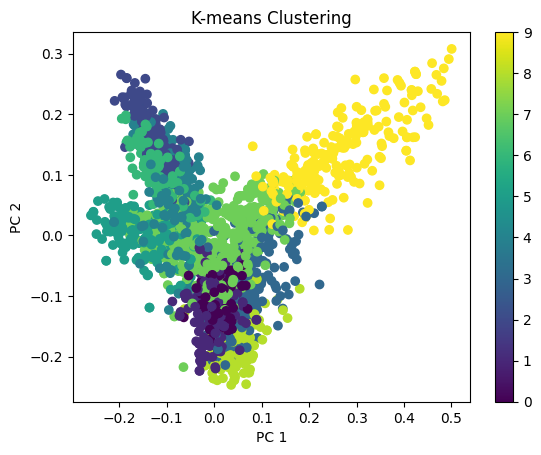

In [91]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(vectorized_words)

kmeans = plt.scatter(pca_data[:,0], pca_data[:,1], c=kmeans.labels_, cmap='viridis')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('K-means Clustering')
plt.colorbar(kmeans)

plt.show()

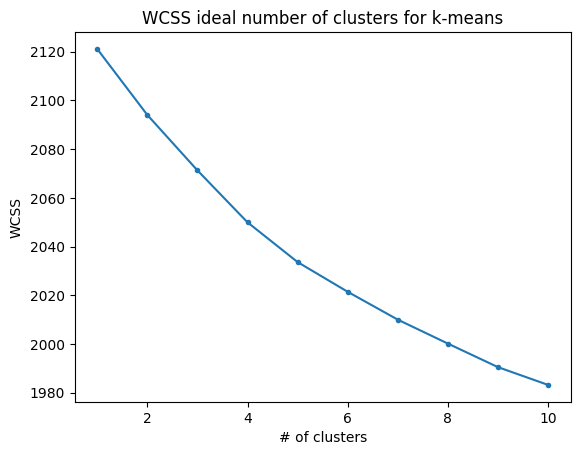

In [56]:
wcssArray = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(vectorized_words)
    wcssArray.append(kmeans.inertia_)

plt.plot(range(1,11), wcssArray, marker='.')

plt.xlabel('# of clusters')
plt.ylabel('WCSS')
plt.title('WCSS ideal number of clusters for k-means')

plt.show()
    

###### DBSCAN

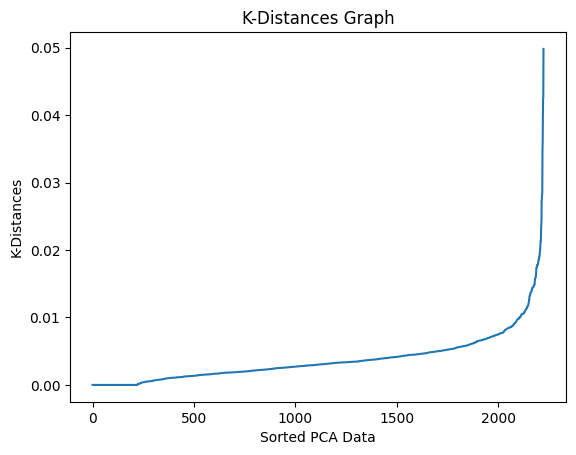

Optimal EPS: 0.01 
 [-1 -1 -1 ... -1 -1 -1]


In [60]:
#DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

neighbours = NearestNeighbors(n_neighbors=2).fit(pca_data)
distances, k_index = neighbours.kneighbors(pca_data)
k_distances = distances[:, -1]

eps_estimate = 0.01
dbscan = DBSCAN(eps=eps_estimate, min_samples=2)
dbscan.fit(vectorized_words)
dbscan_labels = dbscan.labels_


plt.plot(np.sort(k_distances))
plt.xlabel('Sorted PCA Data')
plt.ylabel('K-Distances')
plt.title('K-Distances Graph')
plt.show()

print("Optimal EPS:", eps_estimate, "\n", dbscan_labels)

In [75]:
labels, counts = np.unique(dbscan_labels, return_counts=True)
clusterCount = dict(zip(labels, counts))
number_of_clusters = len(set(dbscan_labels))
noise_points = list(dbscan_labels).count(-1)


for label, count in clusterCount.items():
    if label == -1:
        print(f"Clusters: {number_of_clusters}")
        print(f"Noise points: ", count)
    else:
        print(f'Cluster #{label+1}: {count} articles')

Clusters: 112
Noise points:  2003
Cluster 1: 2 articles
Cluster 2: 2 articles
Cluster 3: 2 articles
Cluster 4: 2 articles
Cluster 5: 2 articles
Cluster 6: 2 articles
Cluster 7: 2 articles
Cluster 8: 2 articles
Cluster 9: 2 articles
Cluster 10: 2 articles
Cluster 11: 2 articles
Cluster 12: 2 articles
Cluster 13: 2 articles
Cluster 14: 2 articles
Cluster 15: 2 articles
Cluster 16: 2 articles
Cluster 17: 2 articles
Cluster 18: 2 articles
Cluster 19: 2 articles
Cluster 20: 2 articles
Cluster 21: 2 articles
Cluster 22: 2 articles
Cluster 23: 2 articles
Cluster 24: 2 articles
Cluster 25: 2 articles
Cluster 26: 2 articles
Cluster 27: 2 articles
Cluster 28: 2 articles
Cluster 29: 2 articles
Cluster 30: 2 articles
Cluster 31: 2 articles
Cluster 32: 2 articles
Cluster 33: 2 articles
Cluster 34: 2 articles
Cluster 35: 2 articles
Cluster 36: 2 articles
Cluster 37: 2 articles
Cluster 38: 2 articles
Cluster 39: 2 articles
Cluster 40: 2 articles
Cluster 41: 2 articles
Cluster 42: 2 articles
Cluster 4

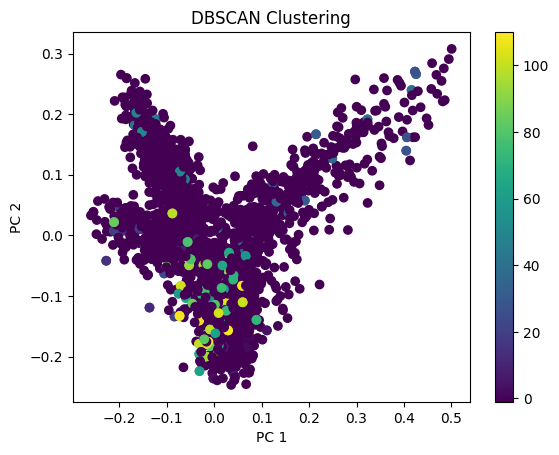

In [80]:
dbscan_plt = plt.scatter(pca_data[:,0], pca_data[:,1], c = dbscan.labels_, cmap ='viridis')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('DBSCAN Clustering')
plt.colorbar(dbscan_plt)

plt.show()

In [86]:
from sklearn.mixture import GaussianMixture

#Gaussian Mixture Model
gmm = GaussianMixture(n_components=5, random_state=1)
gmm.fit(vectorized_words)


print(gmm.predict(vectorized_words.values))

c:\Users\Danyoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
c:\Users\Danyoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


[2 2 2 ... 0 0 4]


In [88]:
gmm_count = Counter(gmm.predict(vectorized_words.values))
gmmlabelList = []

for label, count in gmm_count.items():
    gmmlabelList.append((f'Cluster #{label+1}: {count} articles'))

for x in sorted(gmmlabelList):
    print(x)

c:\Users\Danyoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


Cluster #1: 799 articles
Cluster #2: 317 articles
Cluster #3: 374 articles
Cluster #4: 236 articles
Cluster #5: 499 articles


c:\Users\Danyoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


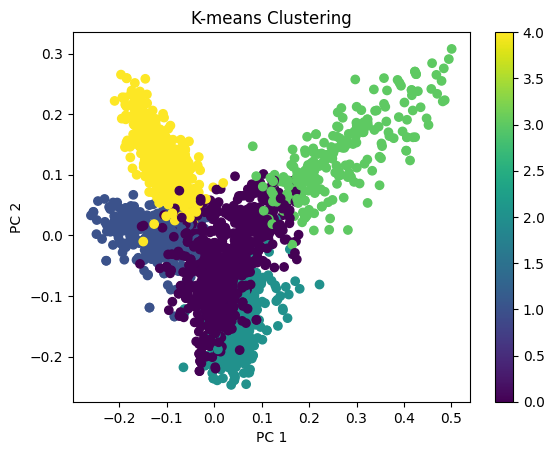

In [90]:
gmm_plt = plt.scatter(pca_data[:,0], pca_data[:,1], c = gmm.predict(vectorized_words.values), cmap='viridis')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Gaussian Mixture Model (GMM) Clustering')
plt.colorbar(gmm_plt)

plt.show()

###### Agglomerative Clustering

In [94]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

#AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters = 5)
agg.fit(vectorized_words)
print(agg.labels_)

[3 3 3 ... 3 4 4]


In [96]:
agg_count = Counter(agg.labels_)
agglabelList = []

for label, count in agg_count.items():
    agglabelList.append((f'Cluster #{label+1}: {count} articles'))

for x in sorted(agglabelList):
    print(x)

Cluster #1: 403 articles
Cluster #2: 496 articles
Cluster #3: 199 articles
Cluster #4: 747 articles
Cluster #5: 380 articles


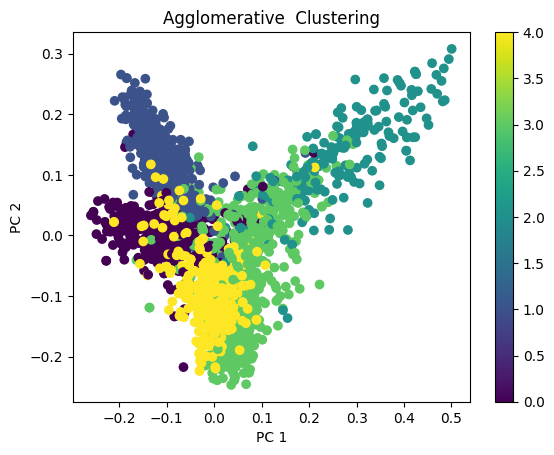

In [97]:
agg_plt = plt.scatter(pca_data[:,0], pca_data[:,1], c = agg.labels_, cmap='viridis')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Agglomerative  Clustering')
plt.colorbar(agg_plt)

plt.show()